# Homework 5 - Taming text

## Introduction

In this homework, a large corpus of emails released in public during the Hillary Clinton email controversy will be explored. The corpus is stored in `Data` directory. More informtion of the schema is available [here](https://www.kaggle.com/kaggle/hillary-clinton-emails).

In [1]:
from os import path
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import string
import re
from nltk.corpus import stopwords
%matplotlib inline

## 1. Word clouds
Generate two word clouds:
* One based on the raw corpus
* One based on the corpus pre-processed using the standard text pipeline. 

### a. __Raw text__
#### @TODO: choose the text to take into account
The data we are going to use for producing the clouds is taken from the file `Emails.csv` and refers to the column `RawText`. Hence, before proceeding to build up a unique cloud, we sould concatenate all the `RawText` of the emails. In particular, we do the following:
* Import the data related to the Emails.

In [2]:
# Read data
emails = pd.read_csv('Data/Emails.csv', sep = ',')
emails.sample(10)
# MetadataSubject; 

Id  DocNumber                                    MetadataSubject  \
1195  1196  C05760496                                              OPRAH   
1154  1155  C05760420                                        CHECKING IN   
6848  6849  C05773249            BRAVO! BRAVA! ISSUE YOUR STATEMENT! SID   
2496  2497  C05763875          HOLBROOKE CALLED FOR YOU LATE LAST NIGHT.   
2551  2552  C05764006                    OUT OF OFFICE AUTOREPLY: SUPERB   
6377  6378  C05772025                                                FW:   
5206  5207  C05769821                                  FLOTUS RE XFLOTUS   
5364  5365  C05770087          H: MEMO ON UK POLITICS/BUDGET/ECONOMY SID   
6653  6654  C05772700  (REUTERS) KOSOVO-SERBIA TALKS LIKELY DELAYED T...   
6932  6933  C05773496           UNDELIVERABLE: FOLLOWUP W SEC NAPOLITANO   

             MetadataTo     MetadataFrom  SenderPersonId  \
1195  abedinh@state.gov                H            80.0   
1154  millscd@state.gov                H            80.0   
6848           sbwhoeop                H            80.0   
2496                  H     Abedin, Huma            81.0   
2551                  H   Sherman, Wendy           213.0   
6377                  H  Mills, Cheryl D            32.0   
5206                  H              PIR           170.0   
5364                  H         sbwhoeop           194.0   
6653                  H     Abedin, Huma            81.0   
6932       Abedin, Huma                H            80.0   

               MetadataDateSent       MetadataDateReleased  \
1195  2009-08-29T04:00:00+00:00  2015-06-30T04:00:00+00:00   
1154  2009-12-08T05:00:00+00:00  2015-06-30T04:00:00+00:00   
6848  2010-02-05T05:00:00+00:00  2015-08-31T04:00:00+00:00   
2496  2009-07-25T04:00:00+00:00  2015-07-31T04:00:00+00:00   
2551  2009-07-31T04:00:00+00:00  2015-07-31T04:00:00+00:00   
6377  2010-11-05T04:00:00+00:00  2015-08-31T04:00:00+00:00   
5206  2010-03-10T05:00:00+00:00  2015-08-31T04:00:00+00:00   
5364  2010-06-27T04:00:00+00:00  2015-08-31T04:00:00+00:00   
6653  2010-10-11T04:00:00+00:00  2015-08-31T04:00:00+00:00   
6932  2010-01-24T05:00:00+00:00  2015-08-31T04:00:00+00:00   

                                        MetadataPdfLink MetadataCaseNumber  \
1195  DOCUMENTS/HRCAll_1_1-29_JuneWEB/6_7_8/DOC_0C05...       F-2014-20439   
1154  DOCUMENTS/HRCAll_1_1-29_JuneWEB/10_11_15_16/DO...       F-2014-20439   
6848  DOCUMENTS/HRCEmail_August_Web/IPS-0119/DOC_0C0...       F-2014-20439   
2496  DOCUMENTS/HRCEmail_JulyWeb/Web_030/DOC_0C05763...       F-2014-20439   
2551  DOCUMENTS/HRCEmail_JulyWeb/Web_030/DOC_0C05764...       F-2014-20439   
6377  DOCUMENTS/HRCEmail_August_Web/IPS-0106/DOC_0C0...       F-2014-20439   
5206  DOCUMENTS/HRCEmail_August_Web/IPS-0064/DOC_0C0...       F-2014-20439   
5364  DOCUMENTS/HRCEmail_August_Web/IPS-0085/DOC_0C0...       F-2014-20439   
6653  DOCUMENTS/HRCEmail_August_Web/IPS-0102/DOC_0C0...       F-2014-20439   
6932  DOCUMENTS/HRCEmail_August_Web/IPS-0117/DOC_0C0...       F-2014-20439   

                            ...                          \
1195                        ...                           
1154                        ...                           
6848                        ...                           
2496                        ...                           
2551                        ...                           
6377                        ...                           
5206                        ...                           
5364                        ...                           
6653                        ...                           
6932                        ...                           

                            ExtractedTo                     ExtractedFrom  \
1195                'abedinh@state.gov'      H <hrod17@clintonemail.com >   
1154                                NaN                               NaN   
6848                           'sbwhoeo       H <hrod17@clintonemail.com>   
2496      

In [3]:
index_null = emails[emails['MetadataSubject'].isnull()].index
index_null_extracted = emails[emails['ExtractedSubject'].isnull()].index#, 'ExtractedSubject']]

In [4]:
# Number that should remain null
len(set(index_null).intersection(set(index_null_extracted)))

250

In [5]:
for i in index_null:
    emails.loc[i,'MetadataSubject'] = emails.loc[i, 'ExtractedSubject']

In [6]:
# Get the subject (replacing na)
emails['MetadataSubject'].fillna('No title', inplace = True)

In [7]:
# Get bodies
emails['ExtractedBodyText'].fillna('No body text', inplace = True)

* Extract the column relates to the `RawText`.

In [8]:
# Useful data
email_corpus = emails[['MetadataSubject', 'ExtractedBodyText']]

* Create a *unique* corpus.

We choose the columns of the data that provide some useful information - merged columns for subject of the email and also body text.

In [9]:
# Create the corpus
unique_corpus_1 = ' '.join([email_corpus['MetadataSubject'][i] for i in range(len(email_corpus))])
unique_corpus_2 = ' '.join([email_corpus['ExtractedBodyText'][i] for i in range(len(email_corpus))])
corpus = [unique_corpus_1] + [unique_corpus_2]

In [10]:
unique_corpus = ' '.join(corpus)

At first we remove all the characters that contain punctuation.

In [11]:
for c in string.punctuation:
    unique_corpus = unique_corpus.replace(c," ")

Thus, we generate the word cloud. For the moment, in order to indentify the most frequent words, we decide not to fix the maximum font size.

In [12]:
# Generate the word cloud 
wordcloud = WordCloud().generate(unique_corpus)

Visualize the output cloud!

(-0.5, 399.5, 199.5, -0.5)

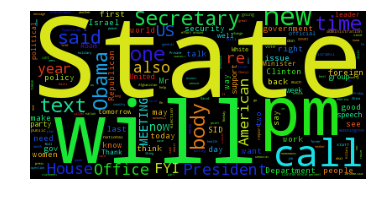

In [13]:
# Display the generated cloud
plt.imshow(wordcloud)
plt.axis("off")

### b. Pre-processed text

To preprocess the text we proceed applying the standard pipeline that includes:
* Tokenization
* Stop-words
* Stemming

We tokenize the corpus and we receive the list of words to further procedure.

In [14]:
text = nltk.word_tokenize(unique_corpus)

In [15]:
len(text)

667487

We remove meaningless, short tokens and we put the rest of them into lowercase.

In [16]:
text_token = [i.lower() for i in text if len(i) > 2]

In [17]:
len(text_token)

505321

We use stopword list extended by the common words we found in the cloud above.

In [18]:
stop_words = set(stopwords.words('english') + ['body', 'text', 'said', 'time','new', 'fyi', 'also', 'first', 'work', 'make', 'call', 'right',
                                               "n't", 'say', 'talk', 'call', 'need', 'one', 'meet', 'today', 'see', 'two', 'year', 'would',
                                               'know', 'would', 'get', 'time', 'morning', 'like', 'back', 'tomorrow', 'think', 'good', 'want',
                                               'could', 'working', 'well', 'house', 'come', 'calling', 'day', 'ask', 'tell', 'states', 'gov',
                                               'secretary', 'state', 'years', 'may', 'last', 'way', 'speech', 'party', 'week', 'thank',
                                               'room', 'many', 'even', 'case', 'much', 'let', 'going', 'take', 'says', 'point', 'next',
                                               'schedule', 'called', 'still', 'told', 'made', 'monday', 'news', 'another', 'long', 'best',
                                               'date', 'tuesday', 'wednesday', 'thursday', 'friday', 'pls'])

In [19]:
filtered_words = [word for word in text_token if word not in stop_words]

We considered using stemming techniques but we abandoned this idea while it couldn't give us more descriptive view of the email content. Also we find not stemmed words easier to proceed.

In [20]:
clean_corpus = ' '.join(filtered_words)

In [21]:
words_cloud = WordCloud().generate(clean_corpus)

In [22]:
words_cloud.words_

[('obama', 1.0),
 ('office', 0.9432950191570881),
 ('president', 0.9371647509578545),
 ('american', 0.7593869731800766),
 ('meeting', 0.7448275862068966),
 ('department', 0.6904214559386973),
 ('government', 0.6551724137931034),
 ('clinton', 0.6505747126436782),
 ('people', 0.6413793103448275),
 ('foreign', 0.5547892720306513),
 ('issue', 0.5088122605363985),
 ('republican', 0.4735632183908046),
 ('women', 0.4582375478927203),
 ('security', 0.4574712643678161),
 ('policy', 0.4528735632183908),
 ('sid', 0.4482758620689655),
 ('israel', 0.4467432950191571),
 ('world', 0.43524904214559385),
 ('support', 0.4329501915708812),
 ('united', 0.4306513409961686),
 ('group', 0.4298850574712644),
 ('political', 0.4191570881226054),
 ('leader', 0.4099616858237548),
 ('minister', 0.4091954022988506),
 ('official', 0.4),
 ('white', 0.3938697318007663),
 ('washington', 0.39080459770114945),
 ('report', 0.38084291187739466),
 ('national', 0.3685823754789272),
 ('bill', 0.3632183908045977),
 ('public', 

(-0.5, 399.5, 199.5, -0.5)

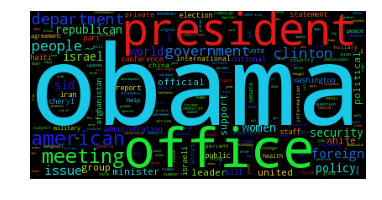

In [23]:
plt.imshow(WordCloud().generate(clean_corpus))
plt.axis("off")

## 2.
Find all the mentions of world countries in the whole corpus, using the pycountry utility (HINT: remember that there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.) Perform sentiment analysis on every email message using the demo methods in the nltk.sentiment.util module. Aggregate the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level) that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo methods from the sentiment analysis module -- can you find substantial differences?

In [27]:
def clean_body(x):
    
    # IMPORTANT STOPWORD IS A VARIABLE ALREADY DECLEARED OUTSIDE
    
    # Tokenize
    text = nltk.word_tokenize(x)
    
    # Replace the comma adding space and go to lowercase
    replace_comma = [(i.replace(',', ', ')).lower() for i in text]
    
    # Get rid of this list of two letters words
    get_rid = list(stop_words) + ["re", "fm", "tv", "al", "aq", "la", "ben", 'no']
    list_words = [i for i in replace_comma if i not in get_rid and len(i) > 1]
       
    # Get back to the string
    join_list = " ".join(list_words)
    
    # Remove all the punctuation
    for c in string.punctuation:
        join_list = join_list.replace(c," ")
    
    text_new = nltk.word_tokenize(join_list)
            
    return text_new

In [28]:
from functools import partial

In [29]:
emails['ExtractedBodyText'] = emails['ExtractedBodyText'].apply(clean_body)

In [30]:
import pycountry

In [31]:
list_country = list(pycountry.countries)
country_dictionary = {}
country_set = []
for country in list_country:
    country_dictionary[country.name] = [(country.alpha_2).lower(), (country.alpha_3).lower()]
    country_set.append((country.alpha_2).lower())
    country_set.append((country.alpha_3).lower())
    country_set.append((country.name).lower())
    
country_set += ['syria', 'russia', 'uk', 'united kingdom', 'great britain']
country_set = set(country_set)

In [32]:
prova = emails['ExtractedBodyText'].loc[1]

In [33]:
prova

['b6',
 'march',
 '2011',
 '9',
 '45',
 'pm',
 'latest',
 'syria',
 'aiding',
 'qaddafi',
 'sid',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311',
 'docx',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311',
 'docx',
 'march',
 '2011',
 'hillary']

## 3.

## 4. *BONUS*